# GRIP : THE SPARK FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS - INTERNSHIP 

By Prashant Richhariya

# Task1: Prediction using supervised ML

In [1]:
# import requried libaries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# import data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


*Preparing the data*

In [3]:
X = s_data.iloc[:,:1]
y = s_data.iloc[:,1:]

In [4]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [6]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [8]:
X_test

,Hours
20,2.7
0,2.5
17,1.9
23,6.9
7,5.5
19,7.4
15,8.9


In [9]:
y_test.values

array([[30],
       [21],
       [24],
       [76],
       [60],
       [69],
       [95]], dtype=int64)

#Training the Algorithm

In [10]:
#spliting the data into training and testing sets
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [11]:
regressor.coef_

array([[9.54942517]])

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
line

,Hours
0,27.058366
1,51.886871
2,33.742963
3,84.354917
4,36.607791
5,17.508940
6,91.039514
7,55.706641
8,82.445032
9,28.968251


InvalidIndexError: (slice(None, None, None), None)

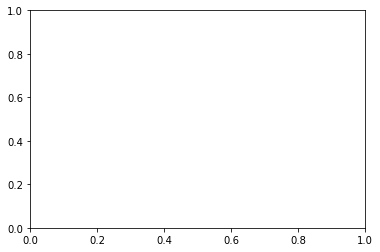

In [14]:
y=line
# Plotting for the test data
plt.plot(X,y,'b*',markersize=12)
plt.show()

Making Predictions

In [52]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([[76.07323675],
       [33.56209949],
       [34.57426943],
       [94.29229557],
       [62.9150276 ],
       [52.79332825],
       [16.3552106 ]])

 Comparing Actual vs Predicted

In [108]:
df1=pd.DataFrame(y_pred,columns=["predicted score"])
df1

,predicted score
0,76.073237
1,33.562099
2,34.574269
3,94.292296
4,62.915028
5,52.793328
6,16.355211


In [109]:
df2=pd.DataFrame(y_test)
df2.reset_index()
df3=df2.reset_index(drop=True)
df3

,Scores
0,69
1,27
2,42
3,88
4,67
5,47
6,20


In [110]:
pd.concat([df1,df3],axis=1)

,predicted score,Scores
0,76.073237,69
1,33.562099,27
2,34.574269,42
3,94.292296,88
4,62.915028,67
5,52.793328,47
6,16.355211,20


In [127]:
# predictor score
hours = 9.25

own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [94.79838054]


EVALUATING THE MODEL

In [128]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.8394932055406015


In [130]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 35.90863249658105
